In [ ]:
from PIL import Image

In [ ]:
!git clone https://github.com/TencentARC/T2I-Adapter.git

Cloning into 'T2I-Adapter'...
remote: Enumerating objects: 1103, done.
remote: Counting objects: 100% (442/442), done.
remote: Compressing objects: 100% (155/155), done.
remote: Total 1103 (delta 305), reused 382 (delta 280), pack-reused 661
Receiving objects: 100% (1103/1103), 4.38 MiB | 33.50 MiB/s, done.
Resolving deltas: 100% (596/596), done.


In [ ]:
%cd T2I-Adapter

/content/T2I-Adapter


In [ ]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 73.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 47.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 777.7/777.7 kB 59.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 84.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 33.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 71.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 66.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 84.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [ ]:
!pip install git+https://github.com/huggingface/diffusers.git@t2iadapterxl # for now
!pip install -U controlnet_aux==0.0.7 # for conditioning models and detectors
!pip install transformers accelerate safetensors

  Cloning https://github.com/huggingface/diffusers.git (to revision t2iadapterxl) to /tmp/pip-req-build-xhgie4nz
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers.git /tmp/pip-req-build-xhgie4nz
  Running command git checkout -b t2iadapterxl --track origin/t2iadapterxl
  Switched to a new branch 't2iadapterxl'
  Branch 't2iadapterxl' set up to track remote branch 't2iadapterxl' from 'origin'.
  Resolved https://github.com/huggingface/diffusers.git to commit e2e633635eb27a133d17cc8faa2a3bfc304dca1c
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.21.0.dev0-py3-none-any.whl size=1379908 sha256=82703a1943e98cda94fba358a70b1820a5bb505a6c453b93faddc4c6ea3ff02e
  Stored in directory: /tmp/pip-ephem-wheel-cache-gd9a5tmn/wheels/e4/a2/c3/7fae834b1e87cfbb83f2852a07d2def8910071c4e66bea8a62
Successfully built diffuse

In [ ]:
!pip install xformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 MB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 2.2 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.1.0
    Uninstalling torch-2.1.0:
      Successfully uninstalled torch-2.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.1.0+cu121 requires torch==2.1.0, but you have torch 2.1.2 which is incompatible.
torchdata 0.7.0 requires torch==2.1.0, but you have torch 2.1.2 which is incompatible.
torchtext 0.16.0 requires torch==2.1.0, but you have torch 2.1.2 which is incompatible.
torchvision 0.16.0+cu121 requires torch==2.1.0, but you have torch 2.1.2 which is incompatible.


In [ ]:
from diffusers import StableDiffusionXLAdapterPipeline, T2IAdapter, EulerAncestralDiscreteScheduler, AutoencoderKL
from diffusers.utils import load_image, make_image_grid
from controlnet_aux.lineart import LineartDetector
import torch

# load adapter
adapter = T2IAdapter.from_pretrained(
  "TencentARC/t2i-adapter-lineart-sdxl-1.0", torch_dtype=torch.float16, varient="fp16"
).to("cuda")

# load euler_a scheduler
model_id = 'stabilityai/stable-diffusion-xl-base-1.0'
euler_a = EulerAncestralDiscreteScheduler.from_pretrained(model_id, subfolder="scheduler")
vae=AutoencoderKL.from_pretrained("madebyollin/sdxl-vae-fp16-fix", torch_dtype=torch.float16)
pipe = StableDiffusionXLAdapterPipeline.from_pretrained(
    model_id, vae=vae, adapter=adapter, scheduler=euler_a, torch_dtype=torch.float16, variant="fp16",
).to("cuda")
pipe.enable_xformers_memory_efficient_attention()

line_detector = LineartDetector.from_pretrained("lllyasviel/Annotators").to("cuda")
#canny_detector = CannyDetector()

/usr/local/lib/python3.10/dist-packages/controlnet_aux/mediapipe_face/mediapipe_face_common.py:7: UserWarning: The module 'mediapipe' is not installed. The package will have limited functionality. Please install it using the command: pip install 'mediapipe'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/controlnet_aux/segment_anything/modeling/tiny_vit_sam.py:654: UserWarning: Overwriting tiny_vit_5m_224 in registry with controlnet_aux.segment_anything.modeling.tiny_vit_sam.tiny_vit_5m_224. This is because the name being registered conflicts with an existing name. Please check if this is not expected.
  return register_model(fn_wrapper)
/usr/local/lib/python3.10/dist-packages/controlnet_aux/segment_anything/modeling/tiny_vit_sam.py:654: UserWarning: Overwriting tiny_vit_11m_224 in registry with controlnet_aux.segment_anything.modeling.tiny_vit_sam.tiny_vit_11m_224. This is because the name being registered conflicts with an existing name. Please check if this is not expected.

config.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/316M [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/631 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

KeyboardInterrupt: ignored

In [ ]:
image = Image.open('edited_image (5).png')
image = line_detector(
    image, detect_resolution=384, image_resolution=1024
)

NameError: ignored

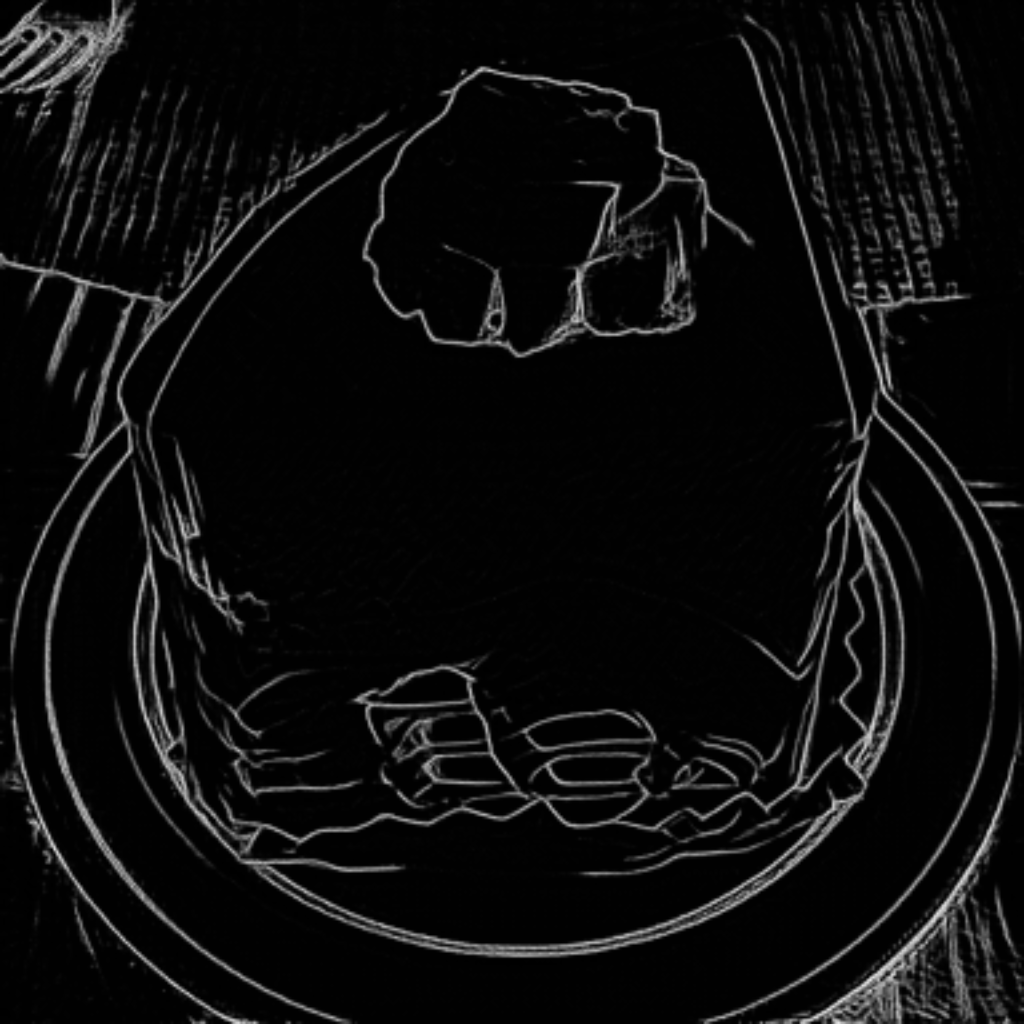

In [ ]:
image

  0%|          | 0/30 [00:00<?, ?it/s]

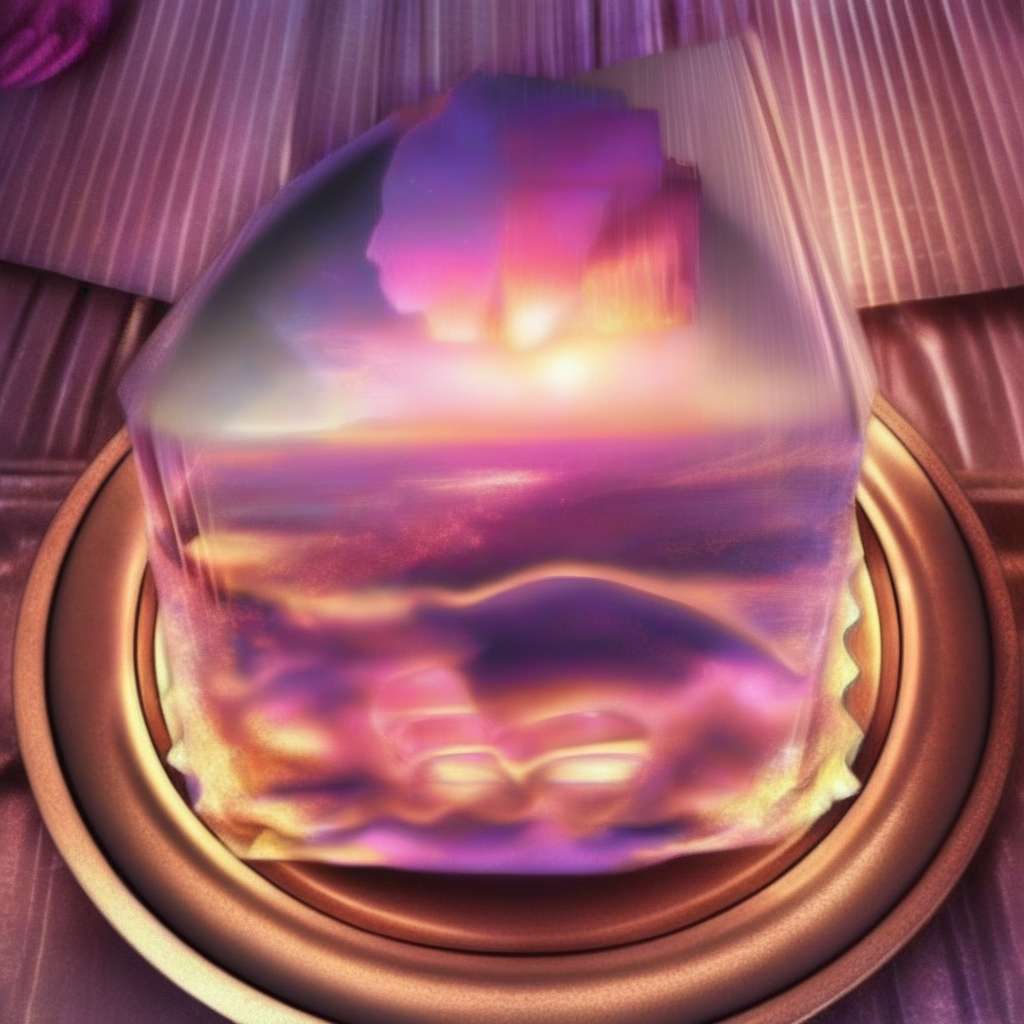

In [ ]:
prompt = "Fantasy art"
#negative_prompt = "anime, cartoon, graphic, text, painting, crayon, graphite, abstract, glitch, deformed, mutated, ugly, disfigured"
#negative_prompt = "village, town"
gen_images = pipe(
    prompt=prompt,
    #negative_prompt=negative_prompt,
    image=image,
    num_inference_steps=30,
    adapter_conditioning_scale=0.8,
    guidance_scale=7.5,
).images[0]
gen_images
#gen_images.save('out_lin.png')